# Project to Predict real-estate price

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv") 

housing is DataFrame --- head() finction displays top 5 data rows --- info() total entries [we can check missing values]

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       505 non-null    float64
 1   ZN         505 non-null    float64
 2   INDUS      505 non-null    float64
 3   CHAS       505 non-null    int64  
 4   NOX        505 non-null    float64
 5   RM         500 non-null    float64
 6   AGE        505 non-null    float64
 7   DIS        505 non-null    float64
 8   RAD        505 non-null    int64  
 9   TAX        505 non-null    int64  
 10  PTRATIO    505 non-null    float64
 11  B          505 non-null    float64
 12  LSTAT      505 non-null    float64
 13  MEDV       505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

After exe describe()

count = ignores null values
mean= average
std=standard Deviation
min=minimum values
max=maximum values


In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,500.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620625,11.386139,11.144832,0.069307,0.554865,6.282360,68.589703,3.792722,9.564356,408.566337,18.456832,356.602436,12.670139,22.508713
std,8.608589,23.340080,6.864761,0.254227,0.115930,0.705492,28.174802,2.107150,8.709391,168.541326,2.166895,91.371169,7.137795,9.190225
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.883000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.205000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.626000,94.100000,5.211900,24.000000,666.000000,20.200000,396.230000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
# for plotting histogram
#import matplotlib.pyplot as plt
#housing.hist(bins=50,figsize=(20,15))

# Test-train splitting

In [9]:
# for learnign
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]


In [10]:
#train_set,test_set=split_train_test(housing,0.2)
#print(f"Rows in train set : {len(train_set)} \n Rows in test set:{len(test_set)} \n")

In [11]:
# startified-sampaling for equal testing on all unique features of model 

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set : {len(train_set)} \n Rows in test set:{len(test_set)} \n")

Rows in train set : 404 
 Rows in test set:101 



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    
    

In [14]:
strat_test_set['CHAS'].value_counts()

0    94
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
# 94/7

In [17]:
# 376/28

In [18]:
housing=strat_train_set.copy()

# Looking for correlations

In [19]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False) #MEDV=>1.0000=Strong +ve correlation if MEDV increases > price also increase

MEDV         1.000000
RM           0.664236
B            0.344895
ZN           0.329297
DIS          0.231936
CHAS         0.214858
RAD         -0.363134
AGE         -0.378935
CRIM        -0.398268
NOX         -0.422316
TAX         -0.442413
INDUS       -0.448252
PTRATIO     -0.485465
LSTAT       -0.738849
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f271f5a4198>,
      dtype=object)

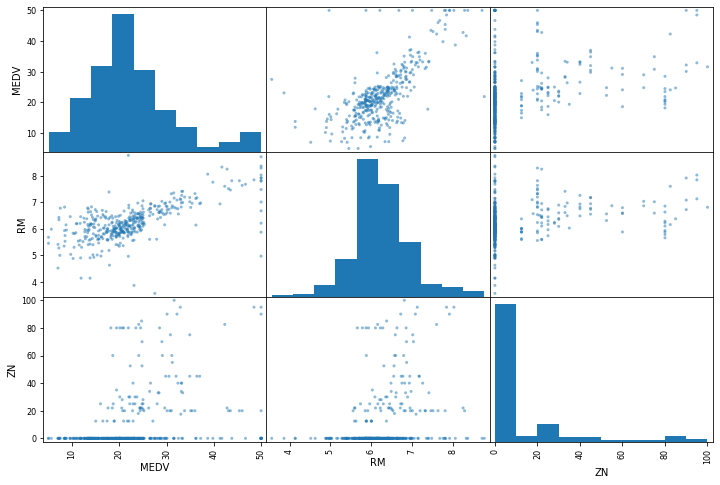

In [20]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN"]
scatter_matrix(housing[attributes],figsize=(12,8))

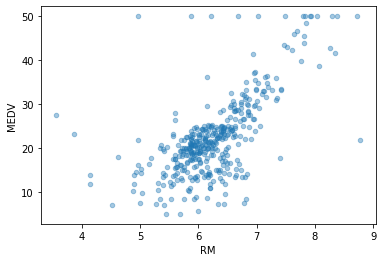

In [21]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.4)

# Trying out attribute combination

In [22]:
housing['TAXRM']=housing['TAX']/housing['RM']

In [23]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9,53.607897
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6,48.277850
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,125.565611
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4,47.508691
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2,47.180667


In [24]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False) #MEDV=>1.0000=Strong +ve correlation if MEDV increases > price also increase

MEDV         1.000000
RM           0.664236
B            0.344895
ZN           0.329297
DIS          0.231936
CHAS         0.214858
RAD         -0.363134
AGE         -0.378935
CRIM        -0.398268
NOX         -0.422316
TAX         -0.442413
INDUS       -0.448252
PTRATIO     -0.485465
TAXRM       -0.503618
LSTAT       -0.738849
Name: MEDV, dtype: float64

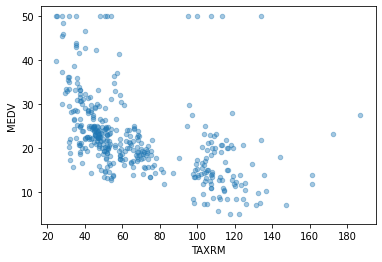

In [25]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.4)

In [26]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

# Missing Attributes

In [27]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [28]:
a = housing.dropna(subset=["RM"]) #Option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(399, 13)

In [29]:
median = housing["RM"].median() # Compute median for Option 3

In [30]:
housing["RM"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

254    5.876
348    6.939
476    5.304
321    6.041
326    6.083
       ...  
154    6.152
423    5.565
98     7.416
455    5.976
215    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)
imputer.statistics_

array([2.9025e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1760e+00, 7.7150e+01, 3.1675e+00, 5.0000e+00, 3.3600e+02,
       1.9050e+01, 3.9094e+02, 1.1570e+01])

In [32]:
X = imputer.transform(housing)

In [33]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [34]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680681,10.233911,11.294183,0.069307,0.557445,6.250082,68.514109,3.776377,9.700495,411.561881,18.496535,353.522649,12.822995
std,8.249728,21.928354,6.829140,0.254290,0.116424,0.688716,28.428821,2.125189,8.756814,168.123946,2.123142,95.111003,7.207684
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.874750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.320000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.176000,77.150000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,12.500000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
    
    
])

In [36]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [37]:
housing_num_tr.shape

(404, 13)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [39]:
some_data=housing.iloc[:5]

In [40]:
some_labels=housing_labels.iloc[:5]

In [41]:
preared_data=my_pipeline.transform(some_data)

In [42]:
model.predict(preared_data)

array([20.54 , 27.239, 12.449, 20.84 , 21.959])

In [43]:
list(some_labels)

[20.9, 26.6, 12.0, 20.4, 22.2]

In [44]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [45]:
mse

1.306632913366339

In [46]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [47]:
list(rmse_scores)

[3.3197604710830935,
 2.6357615135094385,
 4.927223222356261,
 2.7771334844122815,
 2.5605938324927706,
 2.5645155536670075,
 3.1393493035977986,
 3.004280296510295,
 2.0138370527428475,
 4.615241553808425]

In [48]:
def print_scores(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standard Deviation",scores.std())

In [49]:
print_scores(rmse_scores)

Scores [3.31976047 2.63576151 4.92722322 2.77713348 2.56059383 2.56451555
 3.1393493  3.0042803  2.01383705 4.61524155]
Mean 3.155769628418022
Standard Deviation 0.8797623067157352


In [51]:
from joblib import dump,load
dump(model,'restate.joblib')

['restate.joblib']

In [56]:
x_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
x_test_prpared=my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prpared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(y_test))

[23.358 22.53  47.221 33.02  45.918 35.625 20.441 23.891 33.311 19.775
 18.959 29.611 22.097 33.261 20.463 19.276 12.631 21.239 28.283 19.386
 19.975 45.843 12.147 18.96  25.968 33.598 16.448 14.953  7.003 20.696
 23.545 23.908 18.343 14.889 20.807 18.883 22.376 17.075 44.016 18.355
 21.356 18.686 19.771 18.561 33.437  8.485 25.077 14.41  20.888 21.485
 46.368 24.364 14.942 21.576 19.529 47.489 33.776 19.686 34.332 10.99
 24.054 35.494 33.235 23.815 14.029 20.632 20.644 15.633 27.914 24.908
 23.716 32.596 19.217 32.339  9.682 20.139 41.71  19.488 19.937 14.68
 42.234  9.221 23.145 22.453 27.596 16.14  23.022 22.309 20.863 15.961
 26.222 10.154 32.548 13.358 26.068 20.197 33.537 13.646 20.55  20.896
 20.79 ] [24.6, 22.0, 44.8, 23.6, 48.8, 36.5, 19.7, 23.1, 34.6, 21.5, 23.1, 15.0, 23.0, 34.9, 18.5, 10.4, 10.2, 18.9, 23.9, 19.3, 19.4, 48.3, 10.9, 19.6, 27.5, 37.3, 16.1, 15.2, 10.5, 21.4, 23.2, 20.7, 21.7, 13.0, 22.3, 19.6, 21.2, 18.1, 50.0, 23.7, 22.6, 20.5, 18.9, 19.5, 32.7, 8.8, 29.1, 1

In [54]:
final_rmse

3.2932377970803763